# Group Lab 3 – Comparative Urban Change in US States

Authors: Andrew Baker, Jamie Marken, James Lyou, Alberto Melendez, Emmanual Robi

## Part 1

Executive Summary:

The main objective of Lab 3 was to calculate and visualize urban change in WA State from 2008 to 2018. Definitions of "urban" and "non-urban" were used to determine urban change. First, to decide what makes a block group urban or non-urban, the density of census block groups in WA State were calculated. To determine the density, the US definition of urban was used which states that 1,000 people in 1 square mile is urban. This calculation proved that roughly 71% of census block groups in WA State are defined as urban in 2018. Then, the sum of urban land was divided by the sum of land in WA State to give the result of 2% of urbanized land in WA State in 2018. Next, the density of census block groups in 2008 were compared to 2018 block groups to determine a change in urban populations. This comparison indicates that census block groups in WA State are becoming more urban, as 65 block groups became urban from 2008 to 2018 while only 2 block groups became de-urbanized. Finally, two interactive maps were created. The first map visualizes which census block groups in WA State are de-urbanized, urbanized, or that experienced no change in urbanization in 2018. The second map visualizes census block groups that are classified as urban or non-urban in 2018.
 
For part 4, urbanization trends in Oregon and WA State were compared because they are in the same region and have similar land mass, although WA State has about 3 million more people. The methodology for Oregon was the same for WA State, but instead of using census block groups for WA State, counties were used for Oregon. The main result for urbanization classification in Oregon was that Multnomah County is the only county in Oregon that is classified as urban from 2012 to 2018. When the change in urban populations was calculated, the result showed that 0 counties experienced urban change from 2012 to 2018. Therefore, there were no changes in urban trends in Oregon from 2012 to 2018. The differences in urban trends in comparison to WA State are that 65 block groups became urban from 2008 to 2018, while 0 counties became urban in Oregon from 2012 to 2018. Another difference is that only one county (Multnomah) in Oregon is classified as urban, while 65 census block groups in WA State are classified as urban. 


Definitions of urban relative to the United States:

The United States splits "urban area" into two categories. 
Urbanized areas: indicates an area of 50,000 or more people. 
Urban clusters: indicates areas of at least 2,500 people and less than 50,000 people.

The United States defines census block groups as having a population density of at least 1,000 people per square mile.


Definitions of urban relative to Japan and New Zealand:

In Japan, urbanized areas are defined as bordering areas of densely populated districts. They number districts as units with a density requirement of 4,000 people per square km, or 10,000/ square mile.

New Zealand has three classes of urban areas.
main urban areas: the 17 urban areas which have a population of 30,000 more.
secondary urban areas: the 14 urban areas that have a population of 10,000 or more but less than 30,000.
minor urban areas: have a population of at least 1,000 but less than 10,000.

<a href="https://en.wikipedia.org/wiki/Urban_area">Link to Urban Area Reference</a>

Issues with US Census Data:

The data used below are Washington State census block data from Washington State’s Office of Financial Management. Potential issues with this data are how the US Census defines urban, non-urban, and suburban, which can be unclear. 

For example, the definitions of suburban are non-specific. The common definition of suburban is a mixed-use or residential area that is a part of a city/urban area or as a separate residential area within commuting distance to a city/urban area. Definitions of non-urban areas such as this can be messy, as it does not define a suburban area with a numerical density requirement.

<a href="https://en.wikipedia.org/wiki/Suburb">Link to Suburban Definition Reference</a>

There are issues with using US Census Data specifically with demographics. Regarding demographic analysis, there are limitations in the feasibility of producing estimates only at the national level, not at lower geographic levels. There are also issues with only recording broad racial categories (Black or non-Black). In addition, there is uncertainty in estimating total international migration to the United States, particularly emigration, temporary migration, and unauthorized migration.

<a href="https://www.census.gov/history/pdf/2010-background-crs.pdf">Link to Census Data Demographic Issues Reference</a>

## Part 2

In [109]:
#Import pandas and geopandas
import pandas as pd
import geopandas

In [110]:
#Read the SAEP data
fp = "./saep_bg10/saep_bg10.shp"
data = geopandas.read_file(fp)

In [112]:
#Read the FIPS dbf data
fp2 = "./WashingtonFIPS.dbf"
dbf = geopandas.read_file(fp2)

In [108]:
#Divides SAEP data into counties and write the individual divisions to JSON files
county_counter = 0
for row in dbf.FIPSCounty:
    is_in_county = data['COUNTYFP10'] == row
    subset = data[is_in_county]
    subset.to_file(dbf.CountyName[county_counter] + '.json', driver = 'GeoJSON')
    county_counter += 1

GeometryTypeValidationError: Record's geometry type does not match collection schema's geometry type: 'MultiPolygon' != 'Polygon'

In [113]:
#Creates a new dataframe with total populations of each county in 2017
#and prints the top 10 most populous counties
county_pop = pd.DataFrame()
county_pop['FIPSCounty'] = dbf.FIPSCounty
county_pop['CountyName'] = dbf.CountyName
county_pop['Population'] = 0
counter = 0
    
for row in county_pop.FIPSCounty:
    is_in_county = data['COUNTYFP10'] == row
    subset = data[is_in_county]
    county_pop.Population[counter] = sum(subset['POP2017'] + county_pop.Population[counter])
    counter += 1

county_pop = county_pop.sort_values('Population', ascending=False)
print(county_pop.head(n=10))

/Users/Emmanuel/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


   FIPSCounty CountyName  Population
16        033       King     2153700
26        053     Pierce      859399
30        061  Snohomish      789400
31        063    Spokane      499800
5         011      Clark      470999
33        067   Thurston      276900
17        035     Kitsap      264299
38        077     Yakima      253000
36        073    Whatcom      216299
2         005     Benton      193499


## Part 3

In [92]:
#imports necessary packages
import geopandas as gpd
import numpy as np

In [93]:
fp = "./saep_bg10/saep_bg10.shp"
data = gpd.read_file(fp)

#### Part 3.1

In [96]:
#calculates density to determine if a group is urban or non-urban (1000 people in 1 sq mile is urban)
data["urban2018"] = np.where((data['POP2018'] / data['ALANDMI'])>= 1000, 'urban', 'non-urban')
data

,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,INTPTLON10,INTPTLAT10,...,OHU2015,OHU2016,OHU2017,OHU2018,COHU00_10,PCOHU00_10,COHU10_18,PCOHU10_18,geometry,urban2018
0,53,001,950100,1,530019501001,Block Group 1,G5030,S,-118.398815,47.150809,...,279.680,287.530,287.522,287.758,33.751,0.143,17.758,0.066,"POLYGON ((2077217.074095237 640954.0110817049,...",non-urban
1,53,001,950100,2,530019501002,Block Group 2,G5030,S,-118.351143,47.135101,...,521.228,517.427,516.077,524.645,3.398,0.007,-0.355,0.000,"POLYGON ((2165913.051240579 657352.8005365322,...",non-urban
2,53,001,950100,3,530019501003,Block Group 3,G5030,S,-118.382148,47.138222,...,243.965,242.033,241.365,245.491,-26.312,-0.097,-0.509,-0.002,"POLYGON ((2166254.454566129 657810.7137267586,...",non-urban
3,53,001,950200,1,530019502001,Block Group 1,G5030,S,-118.219484,46.874027,...,203.761,205.502,204.547,202.854,-21.255,-0.093,-5.146,-0.025,"POLYGON ((2150159.78406948 554295.8999707696, ...",non-urban
4,53,001,950200,2,530019502002,Block Group 2,G5030,S,-118.522323,46.968569,...,286.251,278.398,278.400,267.983,-1.330,-0.005,-22.017,-0.076,"POLYGON ((2082999.834788324 575018.8611698836,...",non-urban
5,53,001,950200,3,530019502003,Block Group 3,G5030,S,-118.753068,46.939578,...,206.268,207.424,209.674,209.810,7.794,0.040,8.810,0.044,"POLYGON ((2035544.166963593 579401.9638070536,...",non-urban
6,53,001,950300,1,530019503001,Block Group 1,G5030,S,-119.181622,46.789076,...,489.867,496.758,499.751,501.974,63.533,0.158,35.974,0.077,"POLYGON ((1962342.779850264 530894.4193513815,...",non-urban
7,53,001,950300,2,530019503002,Block Group 2,G5030,S,-119.009197,46.828282,...,410.721,414.886,415.793,414.381,46.597,0.131,13.381,0.033,"POLYGON ((2030271.191106173 579329.7872247804,...",non-urban
8,53,001,950300,3,530019503003,Block Group 3,G5030,S,-119.296128,46.852714,...,347.427,352.653,353.780,362.138,6.622,0.020,31.138,0.094,"POLYGON ((1958954.001143497 578398.7521407142,...",non-urban
9,53,001,950300,4,530019503004,Block Group 4,G5030,S,-119.269181,46.771170,...,298.552,303.678,304.404,308.783,42.721,0.176,23.783,0.083,"POLYGON ((1923649.701670551 534968.1963240971,...",non-urban


#### Part 3.2

In [97]:
urban_counter = 0
for row in data['urban2018']:
    if row == 'urban':
        urban_counter += 1

In [98]:
#calculates percentage of groupds that are urban in washington
percent_State_Urban = (float(urban_counter)/4783) * 100
print percent_State_Urban

71.6704996864


#### Part 3.3

In [99]:
urban_land = data

urban_land = urban_land.drop(urban_land[urban_land["urban2018"] != "urban"].index)

In [100]:
land_sum = data['ALANDMI'].sum()
urban_land_sum = urban_land['ALANDMI'].sum()

In [101]:
percent_urbanized = (urban_land_sum / land_sum) * 100
print percent_urbanized

2.2826440216661004


#### Part 3.4

In [102]:
#calculates density of population
data["urban2008"] = np.where((data["POP2008"]/data["ALANDMI"]) >= 1000, 'urban', 'non-urban')

In [103]:
#initializes a column and then compares columns to determine if there is a change
data['ClassChange'] = ''
data["ClassChange"] = np.where((data['urban2008'] == data['urban2018']), 'no change in category', data['ClassChange'])

In [104]:
#keywords are used similarly like the code above, determines change but had to be done slightly differently
keyword1 = 'urban'
keyword2 = 'non-urban'

data["ClassChange"] = np.where((data['urban2008'] == keyword2) & (data['urban2018'] == keyword1), 'urbanized', data['ClassChange'])
data["ClassChange"] = np.where((data['urban2008'] == keyword1) & (data['urban2018'] == keyword2), 'de-urbanized', data['ClassChange'])

In [23]:
data

,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,INTPTLON10,INTPTLAT10,...,OHU2017,OHU2018,COHU00_10,PCOHU00_10,COHU10_18,PCOHU10_18,geometry,urban2018,urban2008,ClassChange
0,53,001,950100,1,530019501001,Block Group 1,G5030,S,-118.398815,47.150809,...,287.522,287.758,33.751,0.143,17.758,0.066,"POLYGON ((2077217.074095237 640954.0110817049,...",non-urban,non-urban,no change in category
1,53,001,950100,2,530019501002,Block Group 2,G5030,S,-118.351143,47.135101,...,516.077,524.645,3.398,0.007,-0.355,0.000,"POLYGON ((2165913.051240579 657352.8005365322,...",non-urban,non-urban,no change in category
2,53,001,950100,3,530019501003,Block Group 3,G5030,S,-118.382148,47.138222,...,241.365,245.491,-26.312,-0.097,-0.509,-0.002,"POLYGON ((2166254.454566129 657810.7137267586,...",non-urban,non-urban,no change in category
3,53,001,950200,1,530019502001,Block Group 1,G5030,S,-118.219484,46.874027,...,204.547,202.854,-21.255,-0.093,-5.146,-0.025,"POLYGON ((2150159.78406948 554295.8999707696, ...",non-urban,non-urban,no change in category
4,53,001,950200,2,530019502002,Block Group 2,G5030,S,-118.522323,46.968569,...,278.400,267.983,-1.330,-0.005,-22.017,-0.076,"POLYGON ((2082999.834788324 575018.8611698836,...",non-urban,non-urban,no change in category
5,53,001,950200,3,530019502003,Block Group 3,G5030,S,-118.753068,46.939578,...,209.674,209.810,7.794,0.040,8.810,0.044,"POLYGON ((2035544.166963593 579401.9638070536,...",non-urban,non-urban,no change in category
6,53,001,950300,1,530019503001,Block Group 1,G5030,S,-119.181622,46.789076,...,499.751,501.974,63.533,0.158,35.974,0.077,"POLYGON ((1962342.779850264 530894.4193513815,...",non-urban,non-urban,no change in category
7,53,001,950300,2,530019503002,Block Group 2,G5030,S,-119.009197,46.828282,...,415.793,414.381,46.597,0.131,13.381,0.033,"POLYGON ((2030271.191106173 579329.7872247804,...",non-urban,non-urban,no change in category
8,53,001,950300,3,530019503003,Block Group 3,G5030,S,-119.296128,46.852714,...,353.780,362.138,6.622,0.020,31.138,0.094,"POLYGON ((1958954.001143497 578398.7521407142,...",non-urban,non-urban,no change in category
9,53,001,950300,4,530019503004,Block Group 4,G5030,S,-119.269181,46.771170,...,304.404,308.783,42.721,0.176,23.783,0.083,"POLYGON ((1923649.701670551 534968.1963240971,...",non-urban,non-urban,no change in category


#### Part 3.5

In [24]:
print data['ClassChange'].value_counts()

no change in category    4716
urbanized                  65
de-urbanized                2
Name: ClassChange, dtype: int64


#### Part 3.6

<IPython.core.display.Javascript object>


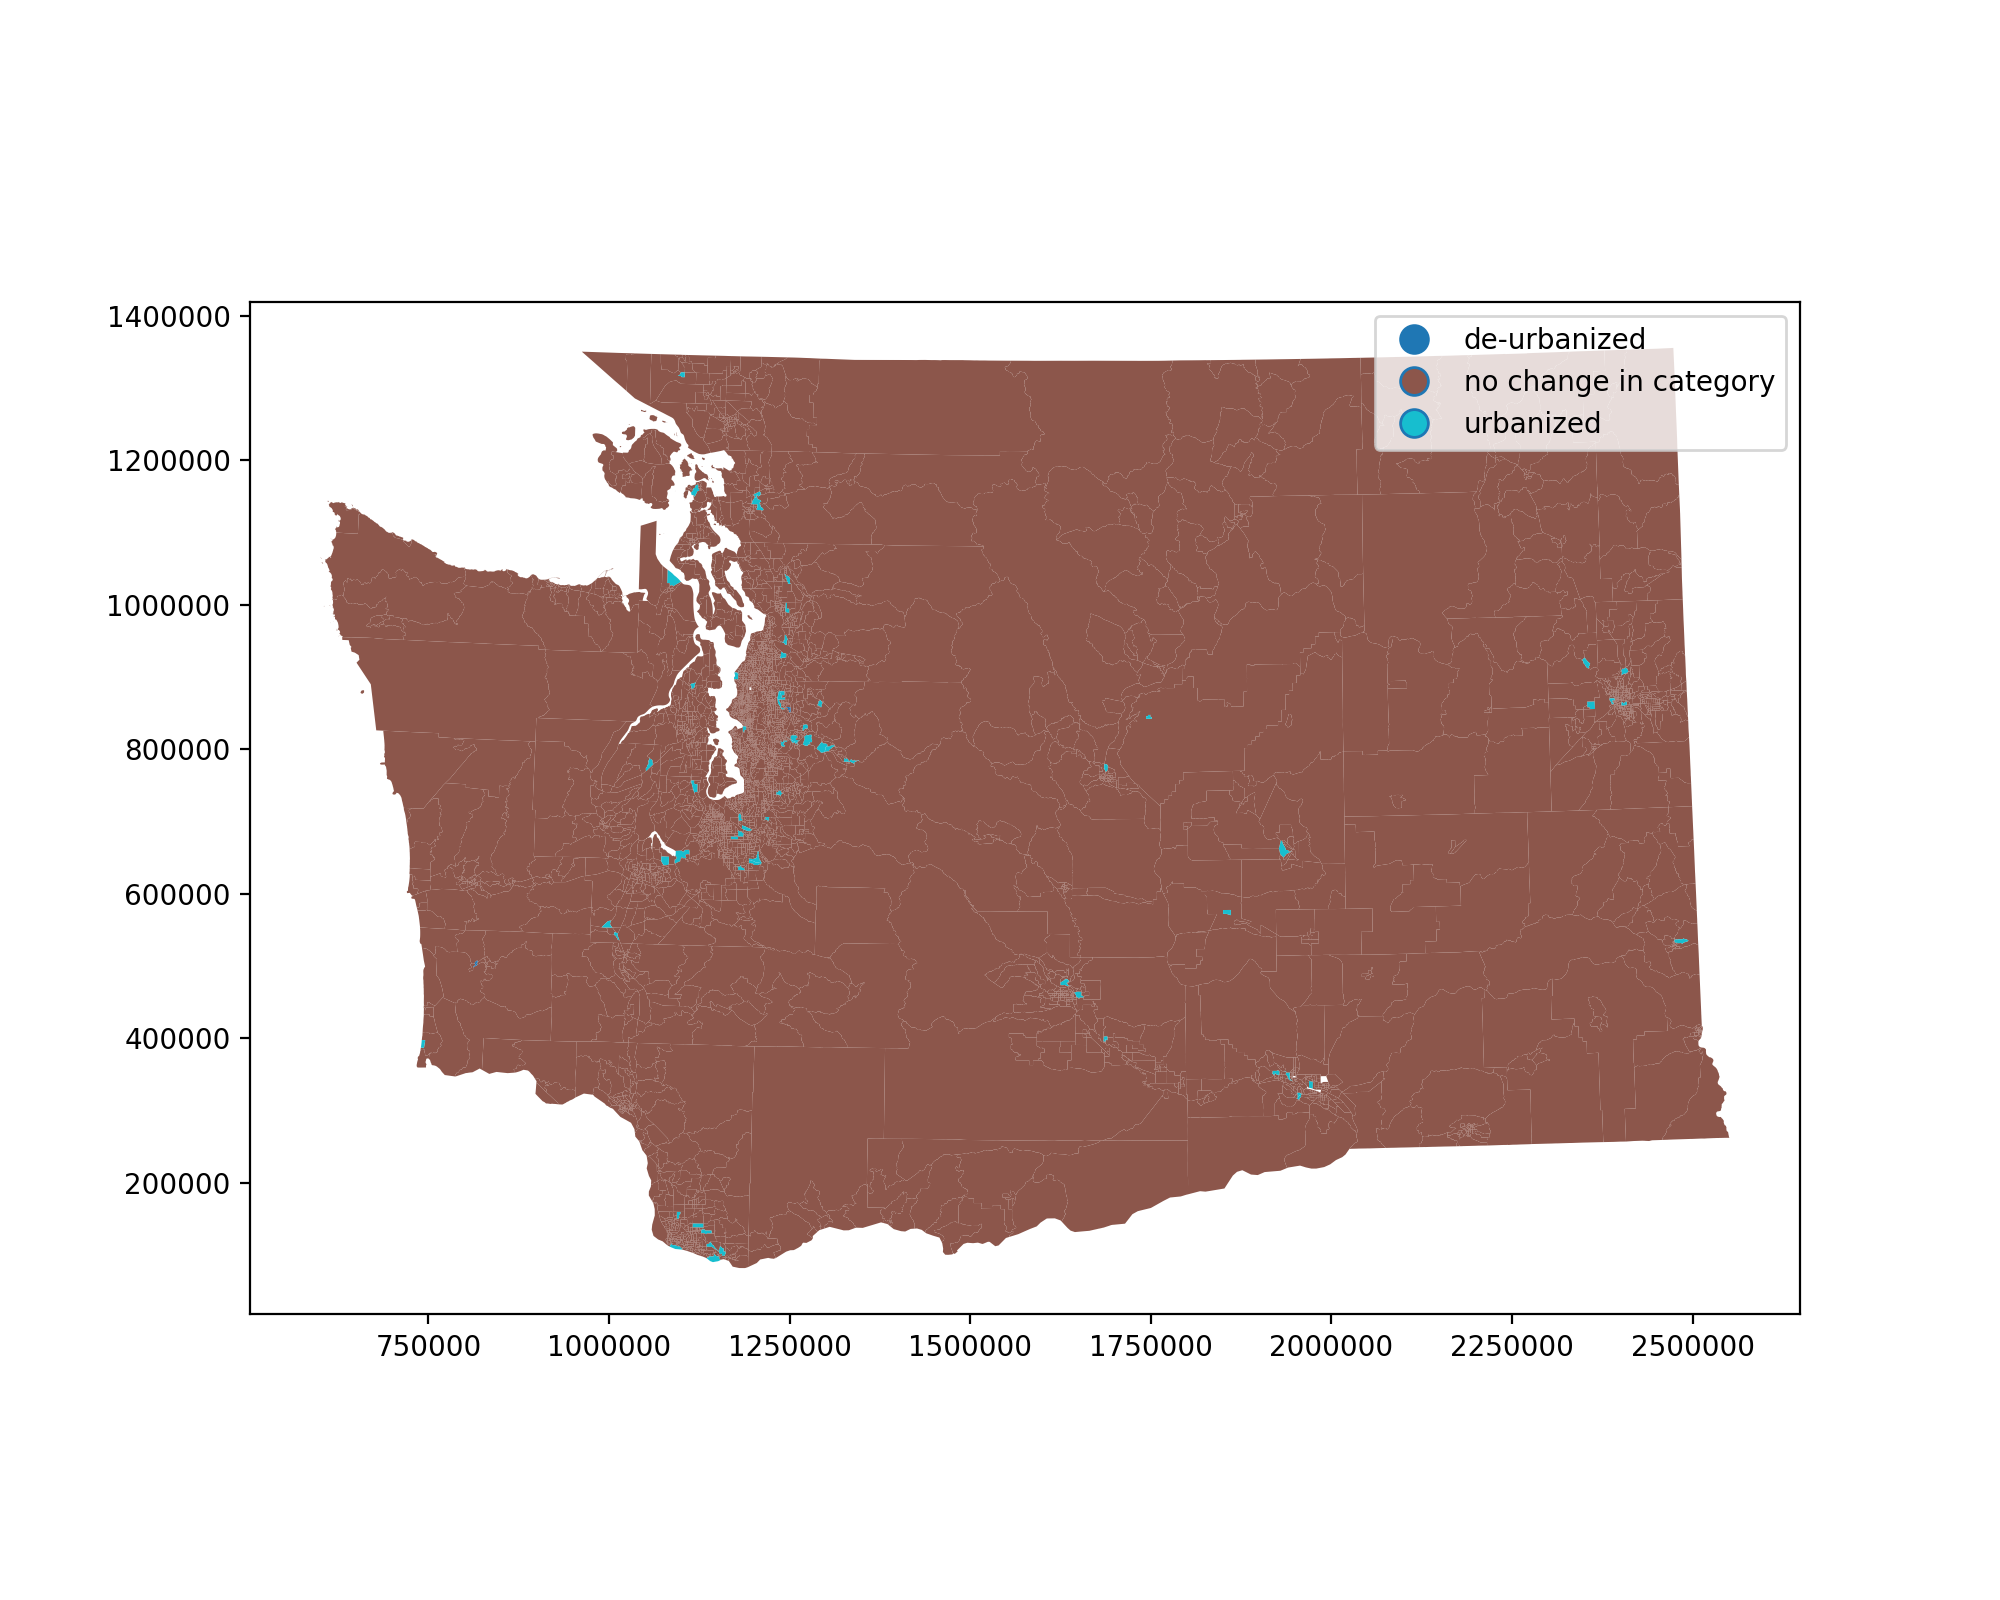

In [86]:
%matplotlib notebook

#removes non-populated blocks (mostly ones that are water)
mapdata = data.drop(data[data['POP2018'] == 0].index)
mapdata.plot(column = "ClassChange",figsize= (10,8), legend = True)

<IPython.core.display.Javascript object>


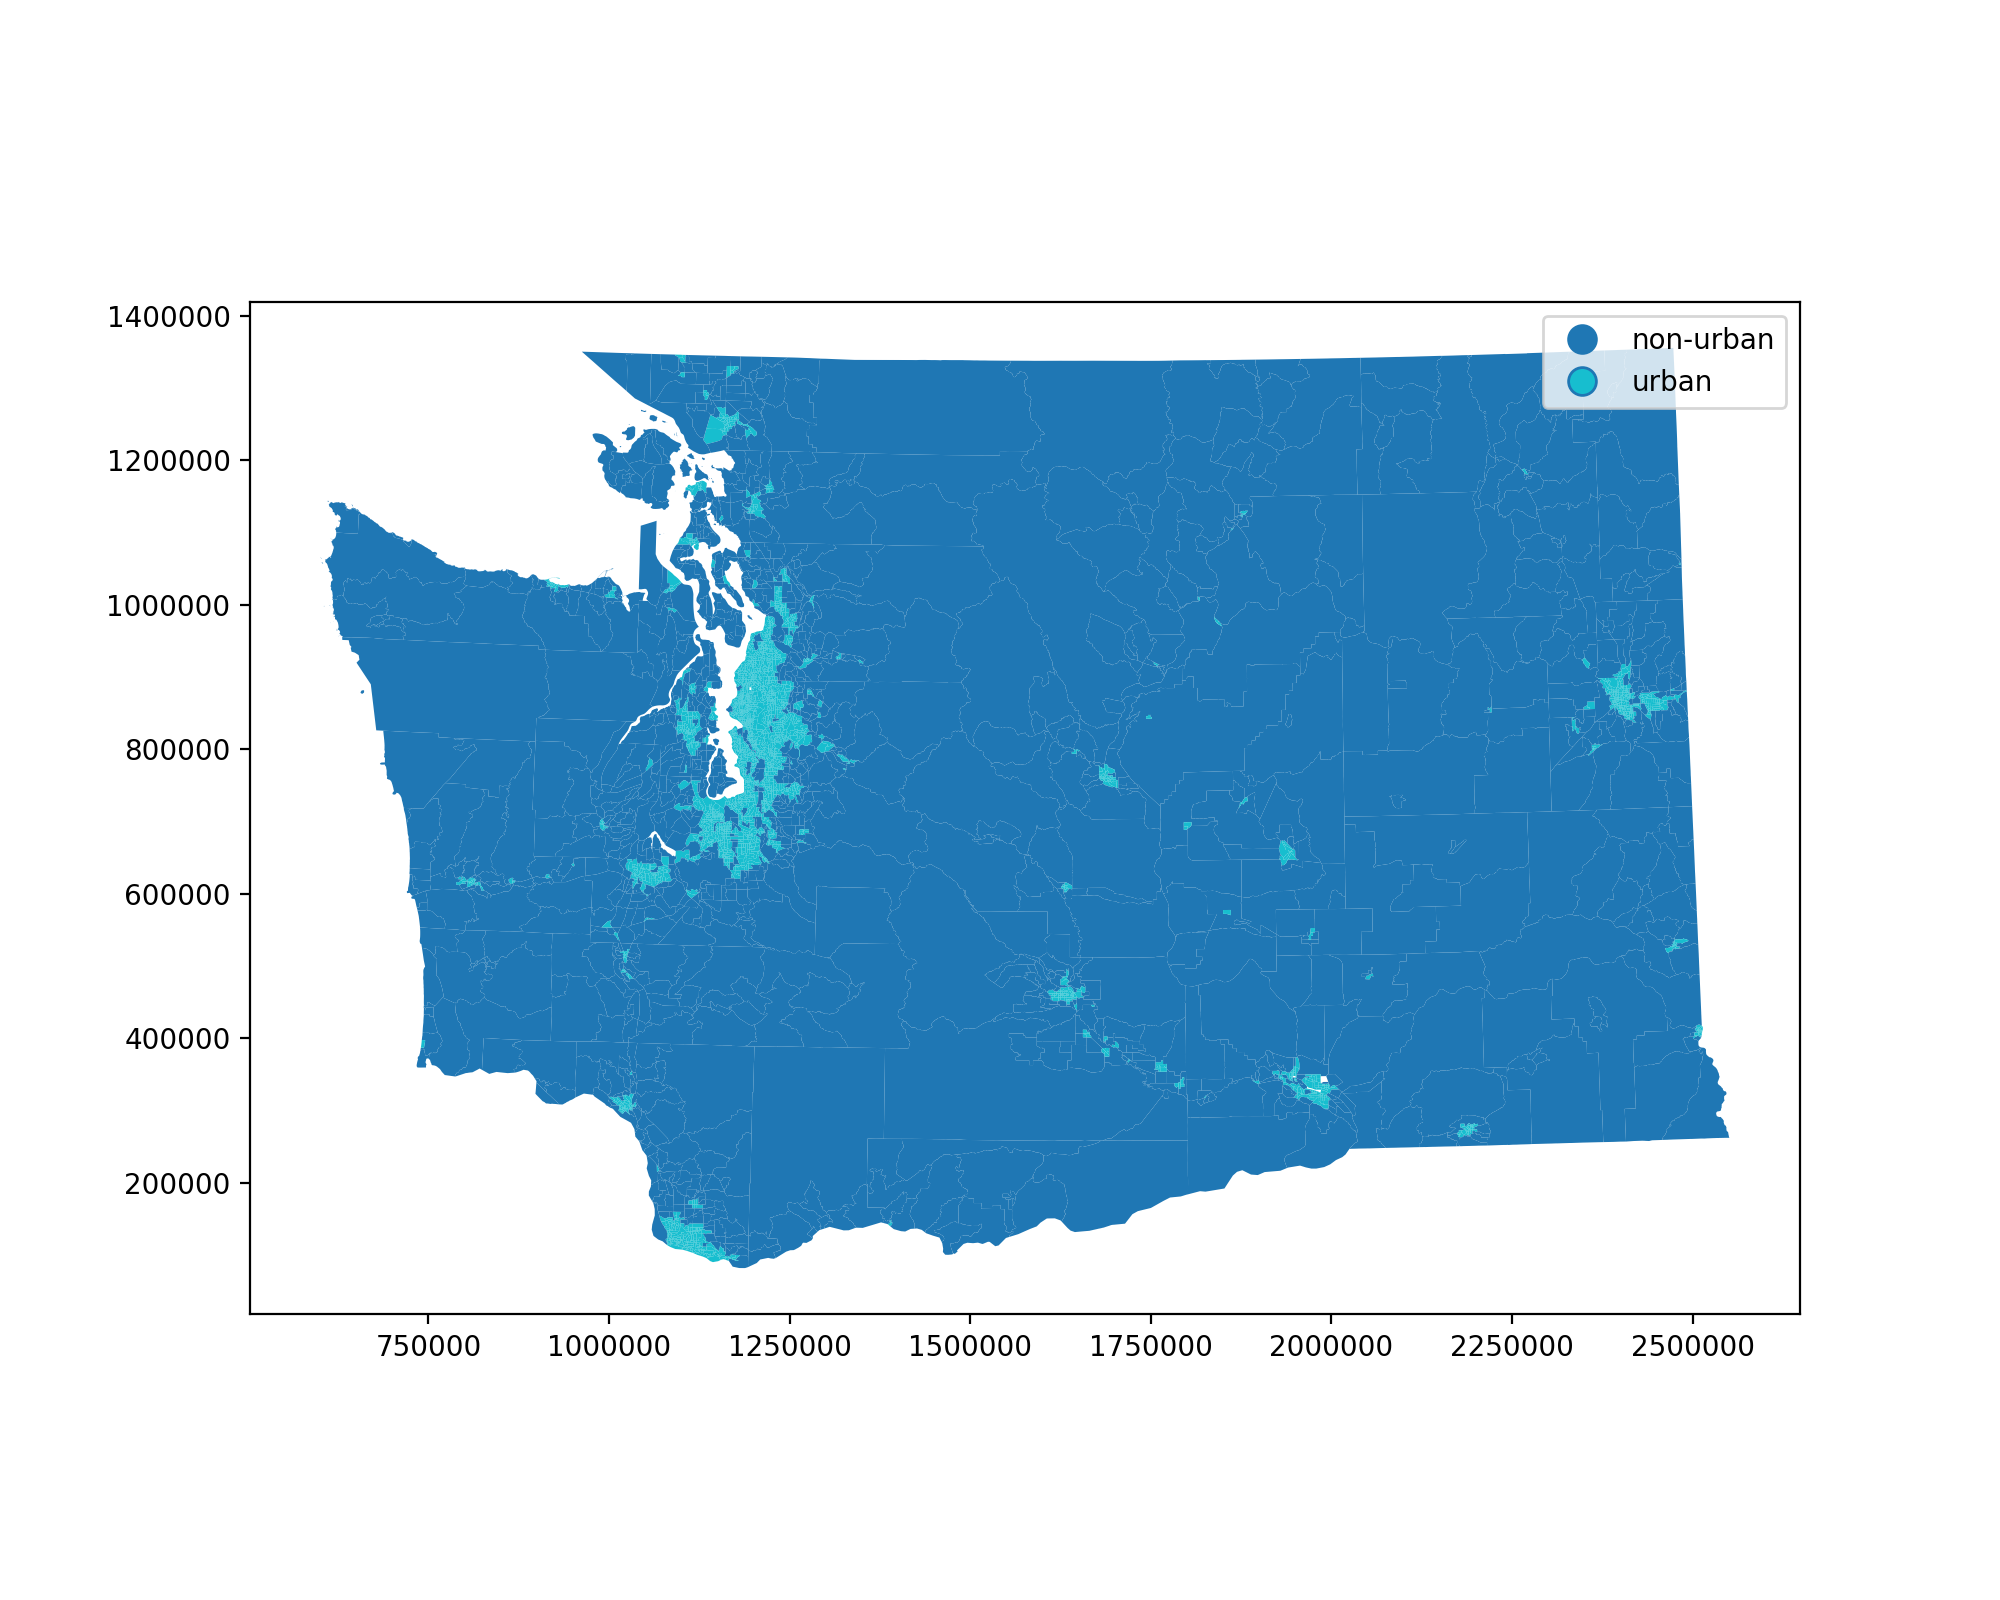

In [26]:
%matplotlib notebook
mapdata.plot(column = "urban2018",figsize= (10,8), legend = True)

## Part 4

In [67]:
#imports necessary packages
import geopandas as gpd
import numpy as np
import csv
import pandas as pd

In [68]:
#imports data
shp = "./Part4/cb_2017_41_bg_500k.shp"
pop = pd.read_csv("./Part4/Population.csv")
data2 = gpd.read_file(shp)


In [69]:
#creates COUNTYFP AND AREA Column
pop['COUNTYFP'] = ["001", "003", "005", "007", "009", "011", "013", "015", "017", "019", "021", "023", "025", "027", "029", "031", "033", "035", "037", "039", "041", "043", "045", "047", "049", "051", "053", "055", "057", "059", "061", "063", "065", "067", "069", "071"]
pop ['Area'] = 0

In [70]:
counter = 0
for row in pop.COUNTYFP: 
    A = data2['COUNTYFP'] == row
    subset = data2[A]
    total_area = sum(subset['ALAND'])
    pop.Area[counter] = total_area + pop.Area[counter]
    counter += 1

/Users/Emmanuel/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [71]:
#converts to INT
pop['Population2012'] = pop['Population2012'].astype(int)
pop['Population2018'] = pop['Population2018'].astype(int)

### Part 4.1

In [72]:
#calculates density of population
pop["Area"] = pop["Area"] * .0000003861

In [73]:
pop["urban2018"] = np.where((pop["Population2018"] / (pop["Area"])) >= 1000, 'urban', 'non-urban')
pop

,County,Population2018,Population2012,COUNTYFP,Area,urban2018
0,Baker County,16054,15914,001,3067.949414,non-urban
1,Benton County,90951,86436,003,675.177907,non-urban
2,Clackamas County,412672,383628,005,1870.673429,non-urban
3,Clatsop County,39182,37339,007,828.260280,non-urban
4,Columbia County,51782,49233,009,657.983225,non-urban
5,Coos County,63888,62637,011,1596.017710,non-urban
6,Crook County,23123,20666,013,2978.876901,non-urban
7,Curry County,22669,22274,015,1628.403145,non-urban
8,Deschutes County,186875,161887,017,3017.588958,non-urban
9,Douglas County,109405,107166,019,5035.631740,non-urban


### Part 4.2

In [74]:
urban_count = 0
for row in pop['urban2018']:
    if row == 'urban':
        urban_count += 1

In [75]:
#calculates percentage of groupds that are urban in washington
percent_State_Urban2 = (float(urban_count)/36) * 100
print percent_State_Urban2

2.77777777778


### Part 4.3

In [76]:
urban_land2 = pop

urban_land2 = urban_land2.drop(urban_land2[urban_land2["urban2018"] != "urban"].index)

In [77]:
land_sum2 = pop['Area'].sum()

urban_land_sum2 = urban_land2['Area'].sum()

In [78]:
percent_urbanized2 = (urban_land_sum2 / land_sum2) * 100

print percent_urbanized2

0.4491465339116722


### Part 4.4

In [79]:
#calculates density of population
pop["urban2012"] = np.where((pop["Population2012"]/pop["Area"]) >= 1000, 'urban', 'non-urban')

In [80]:
#initializes a column and then compares columns to determine if there is a change
pop['ClassChange'] = ''
pop["ClassChange"] = np.where((pop['urban2012'] == pop['urban2018']), 'no change in category', pop['ClassChange'])

In [81]:
#keywords are used similarly like the code above, determines change but had to be done slightly differently
keyword1 = 'urban'
keyword2 = 'non-urban'

pop["ClassChange"] = np.where((pop['urban2012'] == keyword2) & (pop['urban2018'] == keyword1), 'urbanized', pop['ClassChange'])
pop["ClassChange"] = np.where((pop['urban2012'] == keyword1) & (pop['urban2018'] == keyword2), 'de-urbanized', pop['ClassChange'])

### Part 4.6

In [82]:
#Merge data to shape file
data2 = pd.merge(data2, pop)
data2

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,County,Population2018,Population2012,Area,urban2018,urban2012,ClassChange
0,41,023,960100,3,1500000US410239601003,410239601003,3,BG,2127514607,234152,"POLYGON ((-118.962064 44.283455, -118.957377 4...",Grant County,7190,7317,4527.766820,non-urban,non-urban,no change in category
1,41,023,960200,4,1500000US410239602004,410239602004,4,BG,351702339,163990,"POLYGON ((-119.113351 44.419365, -119.111908 4...",Grant County,7190,7317,4527.766820,non-urban,non-urban,no change in category
2,41,023,960200,1,1500000US410239602001,410239602001,1,BG,3530799118,308530,"POLYGON ((-119.656838 44.220277, -119.654993 4...",Grant County,7190,7317,4527.766820,non-urban,non-urban,no change in category
3,41,023,960200,2,1500000US410239602002,410239602002,2,BG,514899640,77636,"POLYGON ((-119.314756 44.382487, -119.312512 4...",Grant County,7190,7317,4527.766820,non-urban,non-urban,no change in category
4,41,023,960100,2,1500000US410239601002,410239601002,2,BG,2390106916,1025653,"POLYGON ((-118.959926 44.73247, -118.957159 44...",Grant County,7190,7317,4527.766820,non-urban,non-urban,no change in category
5,41,023,960200,5,1500000US410239602005,410239602005,5,BG,61125661,0,"POLYGON ((-118.95571 44.362664, -118.956205 44...",Grant County,7190,7317,4527.766820,non-urban,non-urban,no change in category
6,41,023,960200,3,1500000US410239602003,410239602003,3,BG,177599197,12150,"POLYGON ((-119.086742 44.29319599999999, -119....",Grant County,7190,7317,4527.766820,non-urban,non-urban,no change in category
7,41,023,960100,1,1500000US410239601001,410239601001,1,BG,2573180312,71696,"POLYGON ((-119.672228 44.995117, -119.667065 4...",Grant County,7190,7317,4527.766820,non-urban,non-urban,no change in category
8,41,057,960400,6,1500000US410579604006,410579604006,6,BG,305020776,0,"POLYGON ((-123.792599 45.457562, -123.784822 4...",Tillamook County,26690,25326,1102.362969,non-urban,non-urban,no change in category
9,41,057,960400,1,1500000US410579604001,410579604001,1,BG,157655547,0,"POLYGON ((-123.848597 45.496433, -123.843517 4...",Tillamook County,26690,25326,1102.362969,non-urban,non-urban,no change in category


<IPython.core.display.Javascript object>


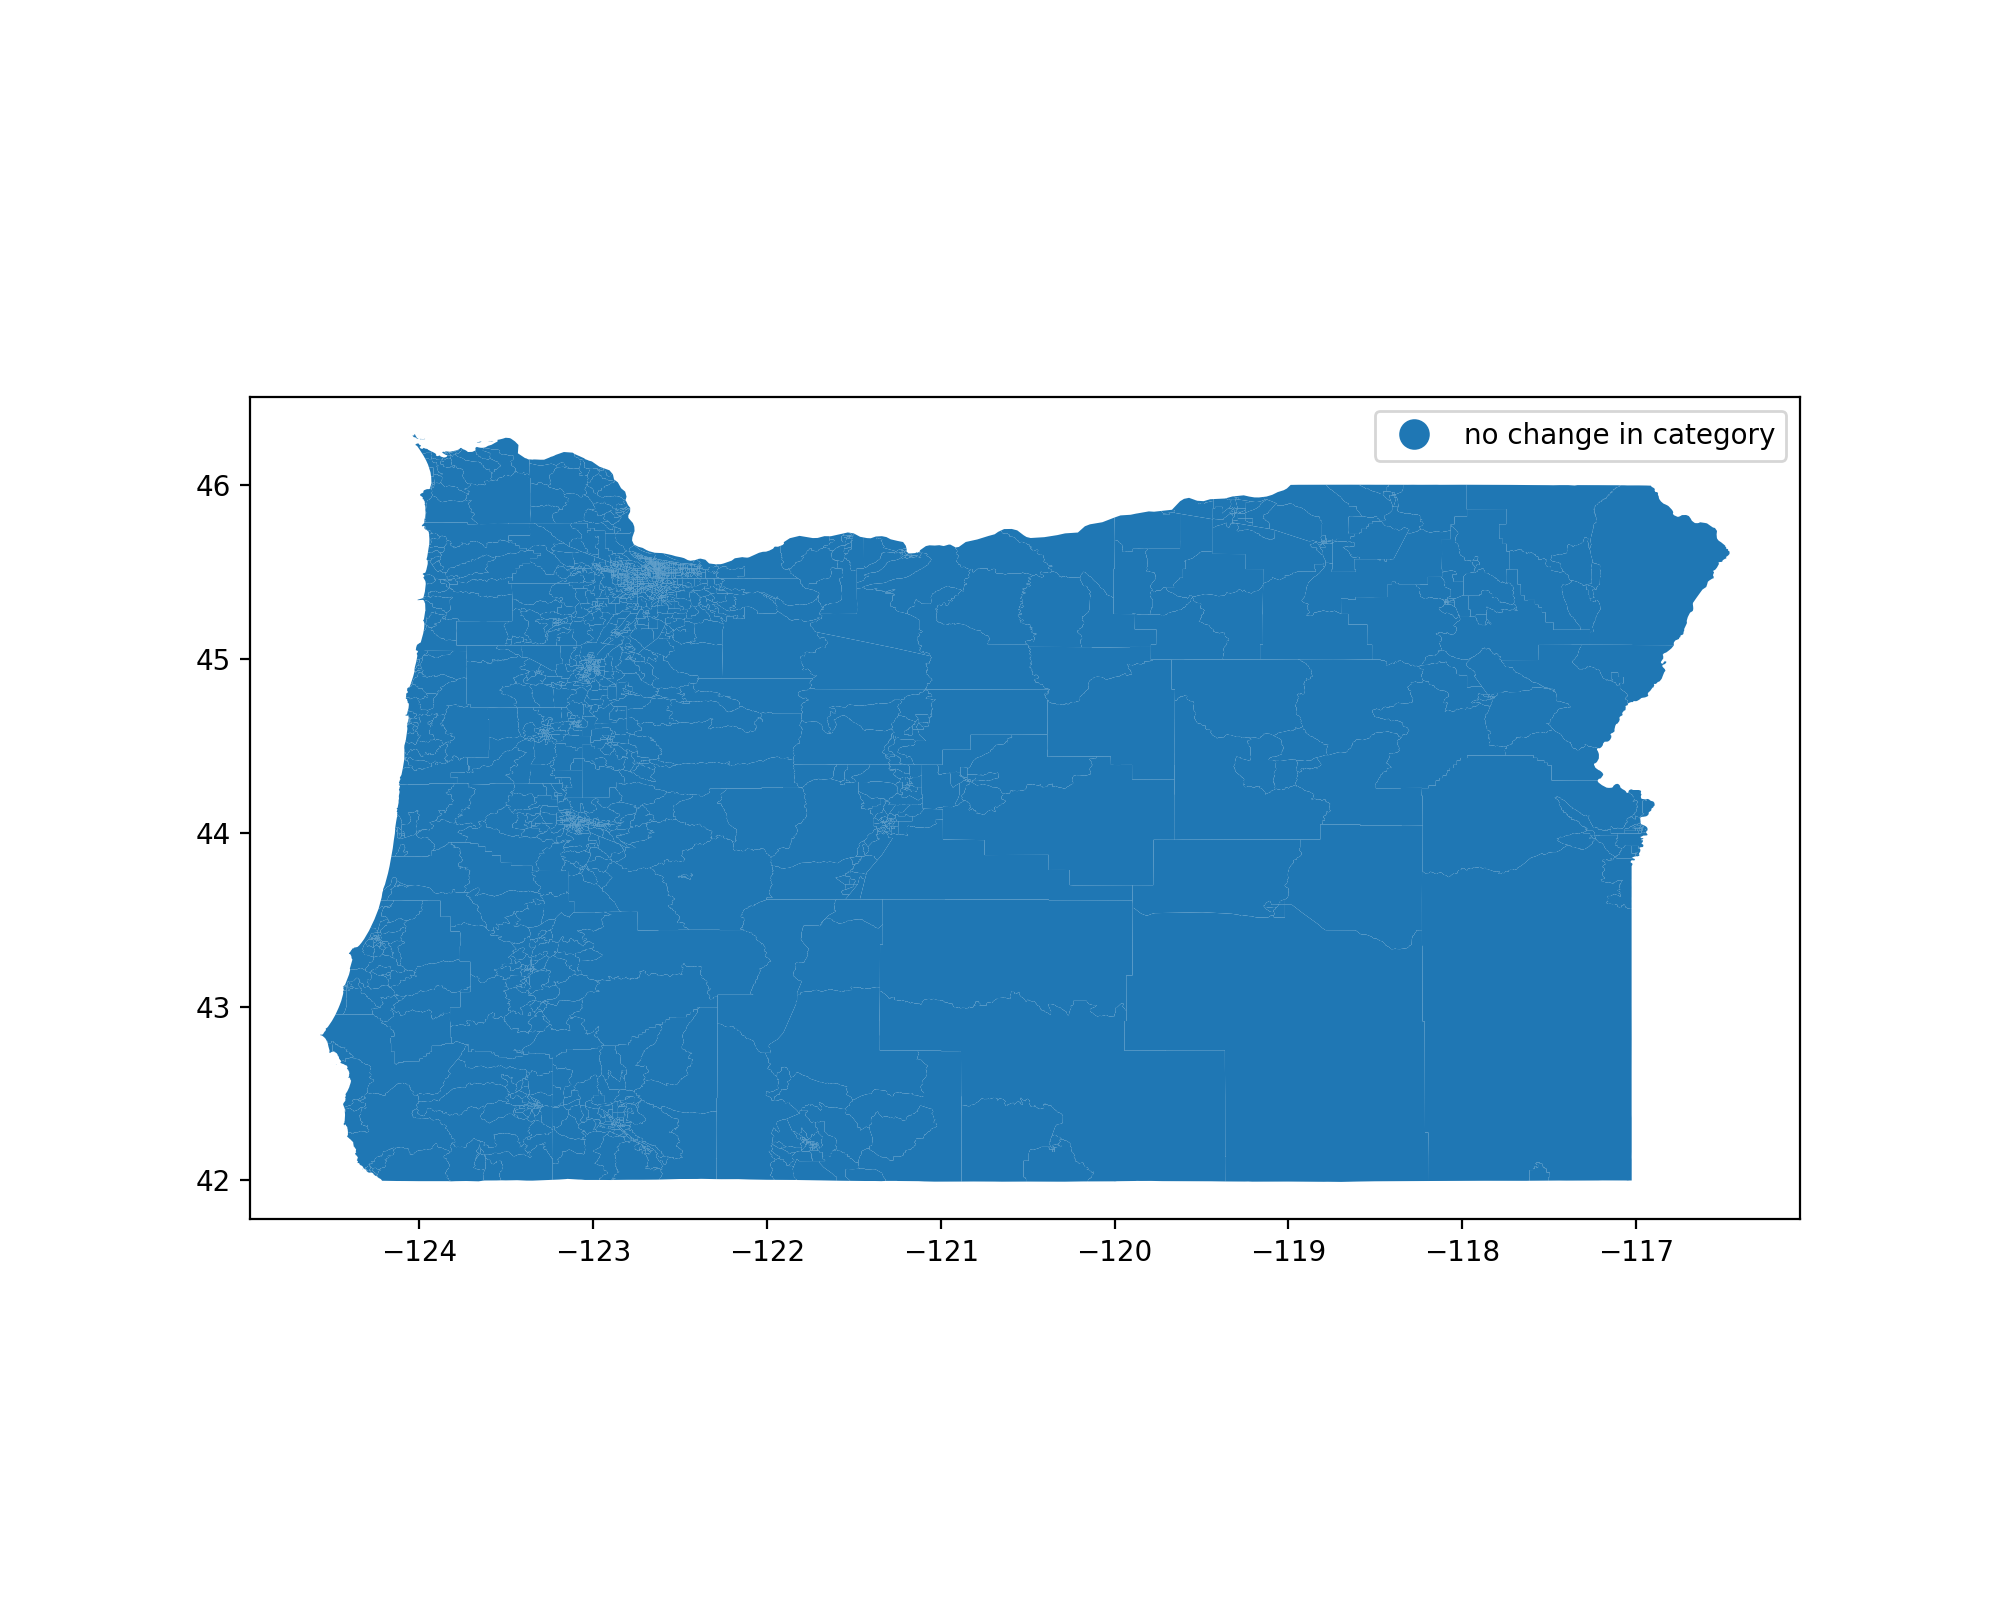

In [85]:
#Map 1 of change in category
%matplotlib notebook

#removes non-populated blocks (mostly ones that are water)
mapdata = data2.drop(data2[data2['Population2018'] == 0].index)
mapdata.plot(column = "ClassChange",figsize= (10,8), legend = True)

<IPython.core.display.Javascript object>


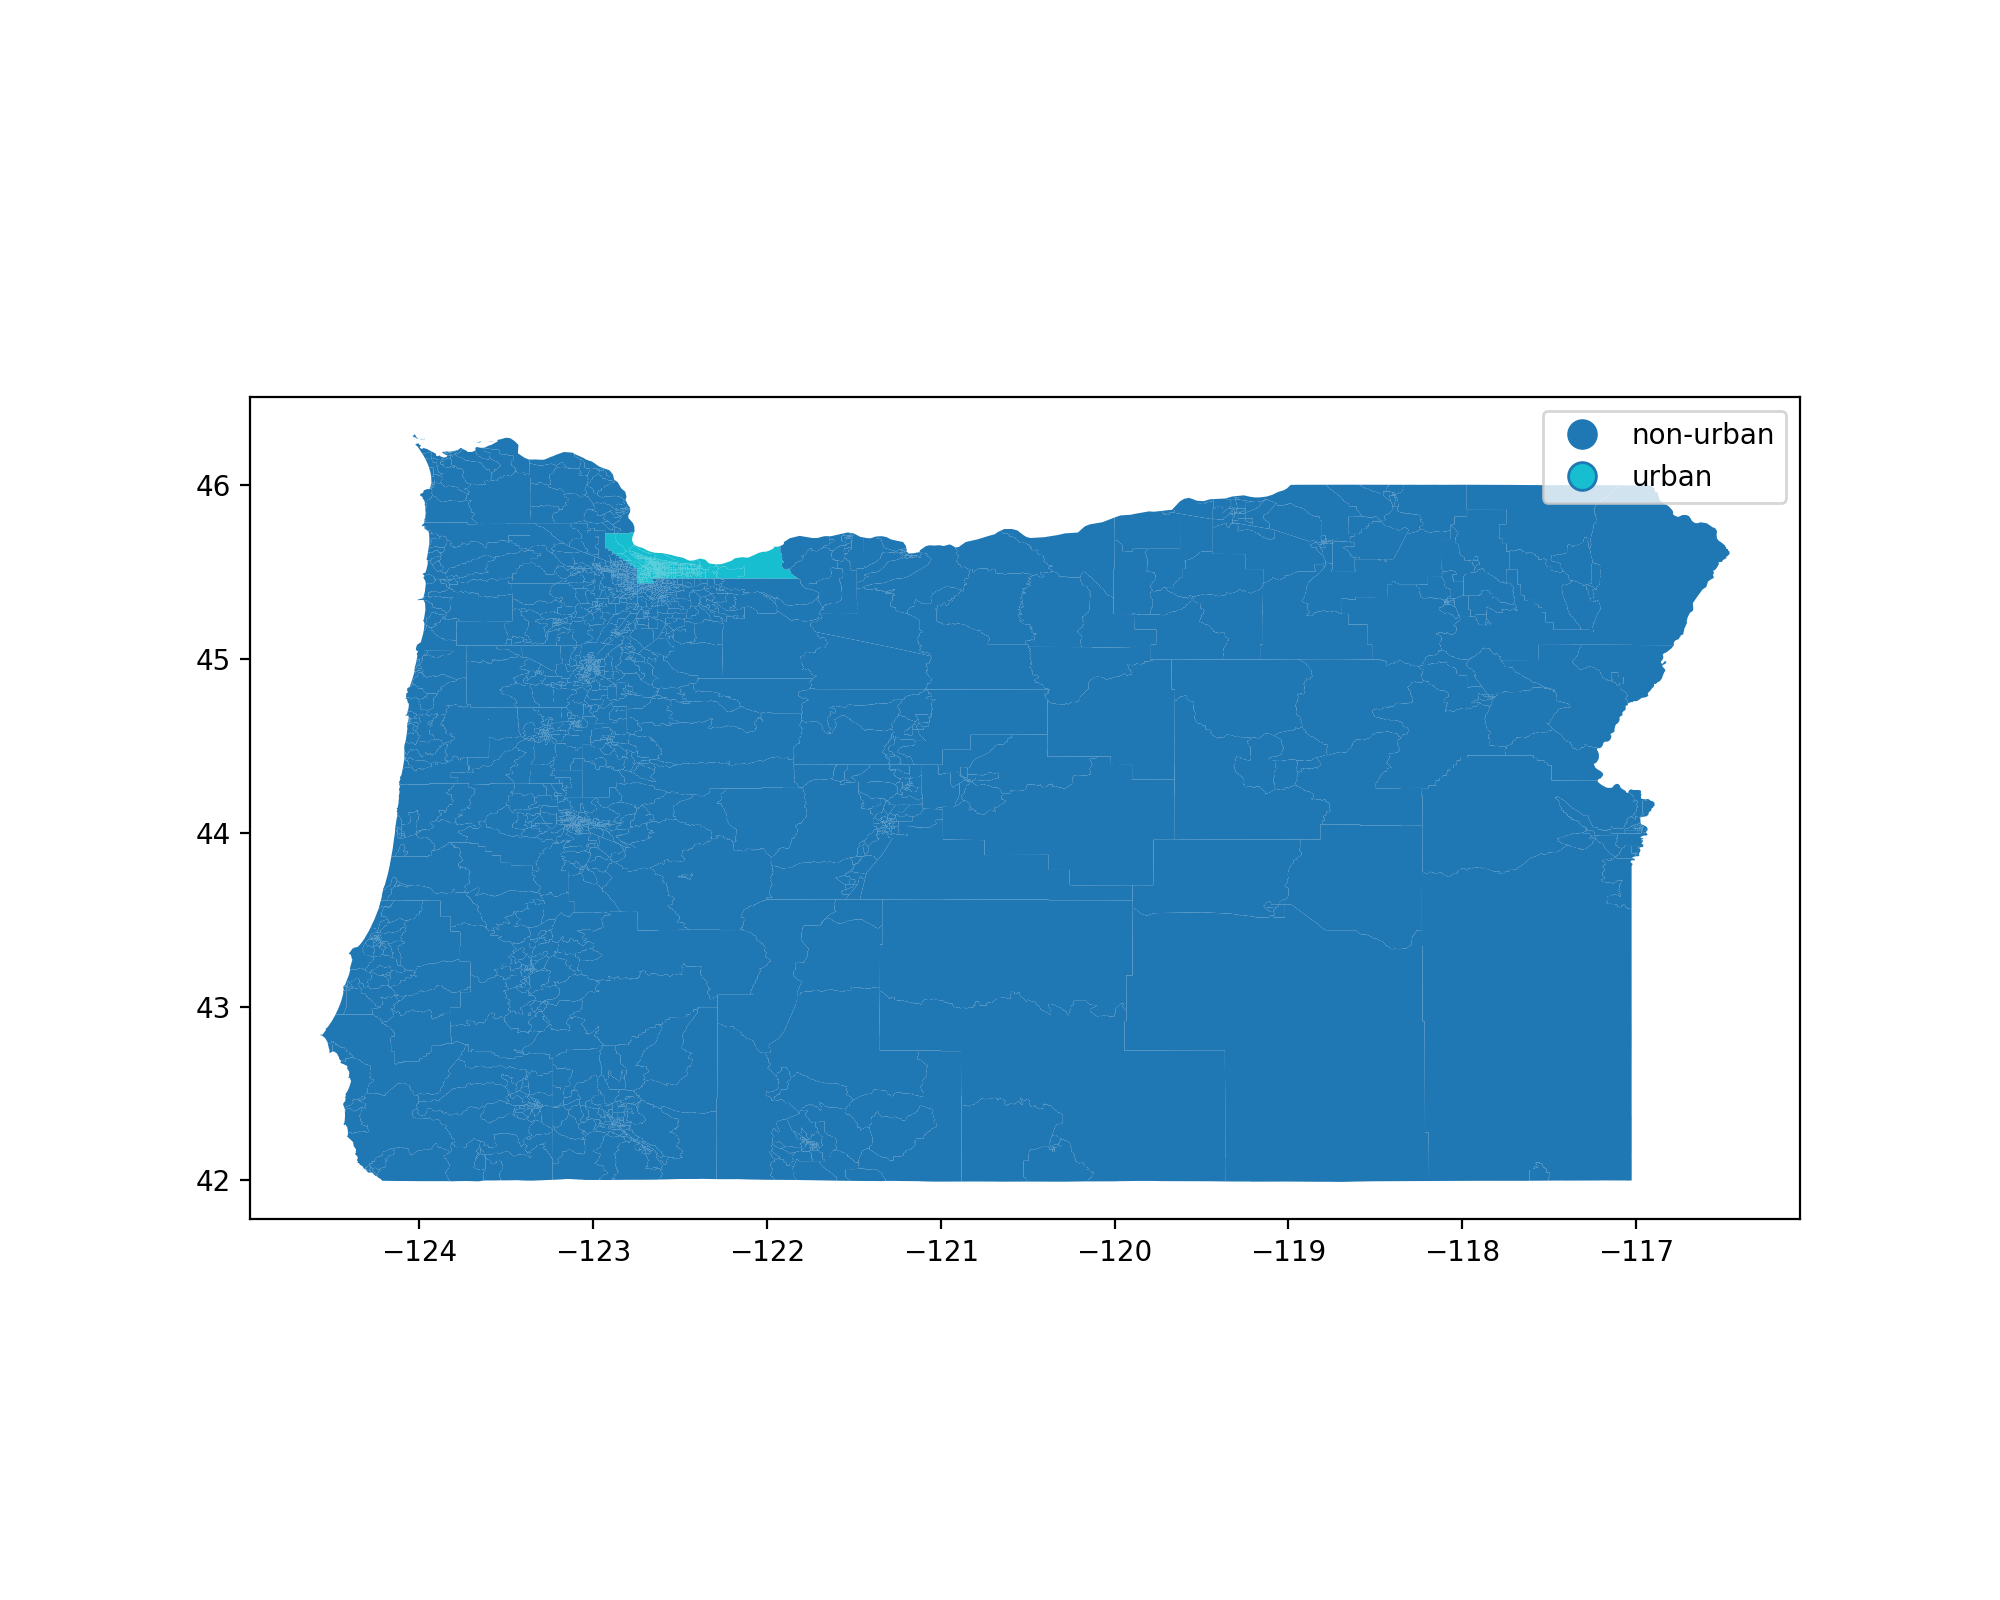

In [84]:
#Map 2 of urban and non-urban
%matplotlib notebook
mapdata.plot(column = "urban2018",figsize= (10,8), legend = True)